# Figure 4E, F

### Import packages

In [1]:
import ABCParse
import adata_query
import cellplots as cp
import larry
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scdiffeq as sdq

cmap = larry.pl.InVitroColorMap()._dict

### Load data

Reference `adata`:

In [2]:
h5ad_path = "/home/mvinyard/data/adata.reprocessed_19OCT2023.more_feature_inclusive.h5ad"
adata = sdq.io.read_h5ad(h5ad_path)

AnnData object with n_obs × n_vars = 130887 × 2492
    obs: 'Library', 'Cell barcode', 'Time point', 'Starting population', 'Cell type annotation', 'Well', 'SPRING-x', 'SPRING-y', 'clone_idx', 'fate_observed', 't0_fated', 'train'
    var: 'gene_ids', 'hv_gene', 'must_include', 'exclude', 'use_genes'
    uns: 'fate_counts', 'h5ad_path', 'time_occupance'
    obsm: 'X_clone', 'X_pca', 'X_umap', 'cell_fate_df'
    layers: 'X_scaled'


Simulated `adata_sim`

In [3]:
h5ad_path = "./version_3/adata_19977.h5ad"
adata_sim = sdq.io.read_h5ad(h5ad_path)

AnnData object with n_obs × n_vars = 82000 × 50
    obs: 't', 'z0_idx', 'sim_i', 'sim', 'state', 'fate', 'drift', 'diffusion'
    uns: 'fate_counts', 'h5ad_path', 'sim_idx', 'simulated'
    obsm: 'X_diffusion', 'X_drift'


### UMAP

Load model

In [4]:
UMAP_model = sdq.io.read_pickle("/home/mvinyard/data/umap_model.pkl")

Transform the data and update `adata` object

In [5]:
adata_sim.obsm['X_umap'] = UMAP_model.transform(adata_sim.X)

### Plot drift UMAP

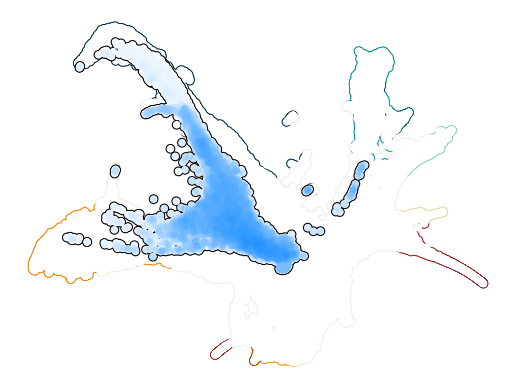

In [14]:
axes = cp.umap_manifold(adata, groupby="Cell type annotation", c_background=cmap, s_background=50, s_cover=30)
axes = cp.umap_manifold(adata_sim, ax = axes[0], s_background=50, s_cover=30, clean_stdev=None)
c = adata_sim.obs["drift"]
xu = adata_sim.obsm['X_umap']
c_idx = np.argsort(c)
axes[0].scatter(
    xu[c_idx, 0],
    xu[c_idx, 1],
    c=c[c_idx],
    s=25,
    zorder=201,
    cmap = cp.tl.custom_cmap(
        min_color=cp.tl.convert_matplotlib_colorname("white"),
        max_color=cp.tl.convert_matplotlib_colorname("dodgerblue"),
    ),
    rasterized=True,
    alpha=0.5,
    ec="None",
)
plt.savefig("Figure4E.svg", dpi = 250)

### Plot diffusion UMAP

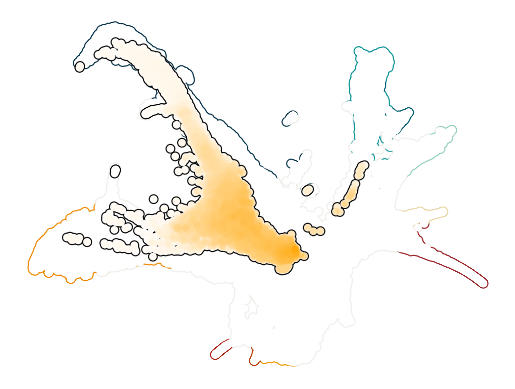

In [15]:
axes = cp.umap_manifold(adata, groupby="Cell type annotation", c_background=cmap, s_background=50, s_cover=30)
axes = cp.umap_manifold(adata_sim, ax = axes[0], s_background=50, s_cover=30, clean_stdev=None)
c = adata_sim.obs["diffusion"]
xu = adata_sim.obsm['X_umap']
c_idx = np.argsort(c)
axes[0].scatter(
    xu[c_idx, 0],
    xu[c_idx, 1],
    c=c[c_idx],
    s=25,
    zorder=201,
    cmap = cp.tl.custom_cmap(
        min_color=cp.tl.convert_matplotlib_colorname("white"),
        max_color=cp.tl.convert_matplotlib_colorname("orange"),
    ),
    rasterized=True,
    alpha=0.5,
    ec="None",
)
plt.savefig("Figure4F.svg", dpi = 250)